# Submission Pertama: Menyelesaikan Permasalahan Human Resources

- Nama: Hafiizh Taufiqul Hakim
- Email: 2012500720@student.budiluhur.ac.id
- Id Dicoding: hafizhtaufiqul1002

# Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
# Manipulasi Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns
import os

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.model_selection import train_test_split

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluasi
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Save Model
import pickle

import warnings
warnings.filterwarnings('ignore')

### Menyiapkan data yang akan digunakan

In [2]:
# import dataset
dataset = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv"

Dataset yang digunakan pada proyek ini adalah **employee_data.csv** yang bersumber dari github Dicoding

# Data Understanding

Adapun kolom-kolom yang terdapat pada dataset sebagai berikut :

- EmployeeId - ID Karyawan.
- Attrition - Apakah terjadi pengurangan karyawan? (0 = tidak, 1 = ya).
- Age - Usia karyawan.
- BusinessTravel - Komitmen perjalanan untuk pekerjaan.
- DailyRate - Gaji harian.
- Department - Departemen Karyawan.
- DistanceFromHome - Jarak dari tempat kerja ke rumah (dalam km).
- Education - 1-Sekolah Menengah Pertama, 2-Sekolah Menengah Atas, 3-Sarjana, 4-Sarjana, 5-Doktor.
- EducationField - Bidang Pendidikan.
- EnvironmentSatisfaction - 1-Rendah, 2-Sedang, 3-Tinggi, 4-Sangat Tinggi.
- Gender - Jenis kelamin karyawan.
- HourlyRate - Gaji per jam.
- JobInvolvement - 1-Rendah, 2-Sedang, 3-Tinggi, 4-Sangat Tinggi.
- JobLevel - Tingkat pekerjaan (1 hingga 5).
- JobRole - Peran Pekerjaan.
- JobSatisfaction - 1-Rendah, 2-Sedang, 3-Tinggi, 4-Sangat Tinggi.
- MaritalStatus - Status Pernikahan.
- MonthlyIncome - Gaji bulanan.
- MonthlyRate - Tarif per bulan.
- NumCompaniesWorked - Jumlah perusahaan tempat bekerja.
- Over18 - Berusia di atas 18 tahun?.
- OverTime - lembur?.
- PercentSalaryHike - Persentase kenaikan gaji tahun lalu.
- PerformanceRating - 1-Rendah, 2-Baik, 3-SangatBaik, 4-LuarBiasa.
- RelationshipSatisfaction - 1-Rendah, 2-Sedang, 3-Tinggi, 4-Sangat Tinggi.
- StandardHours - Jam Standar.
- StockOptionLevel - Tingkat Opsi Saham.
- TotalWorkingYears - Total tahun bekerja.
- TrainingTimesLastYear - Jumlah pelatihan yang diikuti tahun lalu.
- WorkLifeBalance - 1-Rendah, 2-Baik, 3-Sangat Baik, 4-Sangat Baik.
- YearsAtCompany - Tahun di Perusahaan.
- YearsInCurrentRole - Tahun dalam peran saat ini.
- YearsSinceLastPromotion - Tahun sejak promosi terakhir.
- YearsWithCurrManager - Tahun dengan manajer saat ini.

# Data Preparation

##### Gathering data

In [3]:
df = pd.read_csv(dataset)
df.sample(5).T

,1356,1303,580,1363,613
EmployeeId,1357,1304,581,1364,614
Age,34,47,31,32,36
Attrition,0.0,0.0,1.0,NaN,0.0
BusinessTravel,Travel_Frequently,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Frequently
DailyRate,303,217,202,414,541
Department,Sales,Sales,Research & Development,Sales,Sales
DistanceFromHome,2,3,8,2,3
Education,4,3,3,4,4
EducationField,Marketing,Medical,Life Sciences,Marketing,Medical
EmployeeCount,1,1,1,1,1


##### Asessing Data

In [4]:
# Cek Tipe Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

Seluruh tipe data sudah sesuai, tetapi ada satu fitur di mana tipe data pada kolom Attrition akan diubah menjadi int.

In [5]:
num = df.select_dtypes(exclude='object').columns
cat = df.select_dtypes(include='object').columns

print("Jumlah data numerik:", len(num))
print("Jumlah data kategorik:", len(cat))

Jumlah data numerik: 27
Jumlah data kategorik: 8


In [6]:
# Cek Missing Value
df.isna().sum()

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

Terdapat missing value pada kolom Attrition, Sehingga perlu dilakukan penanganan terhadap kolom yang terdapat missing value

In [7]:
# Cek Duplicated
df.duplicated().sum()

0

Tidak terdapat duplikasi pada dataset

In [8]:
# kolom Attrition
df.Attrition.value_counts()

Attrition
0.0    879
1.0    179
Name: count, dtype: int64

In [9]:
# kolom EmployeeCount
df.EmployeeCount.value_counts()

EmployeeCount
1    1470
Name: count, dtype: int64

In [10]:
# kolom Over18
df.Over18.value_counts()

Over18
Y    1470
Name: count, dtype: int64

In [11]:
df.StandardHours.value_counts()

StandardHours
80    1470
Name: count, dtype: int64

In [12]:
# Cek Outlier
print(f'Jumlah baris: {len(df)}')

outlier = []
no_outlier = []
is_outlier = []
low_lim = []
high_lim = []


filtered_entries = np.array([True] * len(df))
for col in num:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    #mulai filter outlier
    filter_outlier = ((df[col] >= low_limit) & (df[col] <= high_limit))
    outlier.append(len(df[~filter_outlier]))
    no_outlier.append(len(df[filter_outlier]))
    is_outlier.append(df[col][~filter_outlier].any())
    low_lim.append(low_limit)
    high_lim.append(high_limit)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries

print("Outlier All Data :", len(df[~filtered_entries]))
print("Not Outlier All Data :", len(df[filtered_entries]))
print()

pd.DataFrame({
    "Column Name":num,
    "is Outlier": is_outlier,
    "Lower Limit": low_lim,
    "Upper Limit": high_lim,
    "Outlier":outlier,
    "No Outlier":no_outlier
})

Jumlah baris: 1470
Outlier All Data : 1018
Not Outlier All Data : 452



,Column Name,is Outlier,Lower Limit,Upper Limit,Outlier,No Outlier
0,EmployeeId,False,-733.500,2204.500,0,1470
1,Age,False,10.500,62.500,0,1470
2,Attrition,True,0.000,0.000,591,879
3,DailyRate,False,-573.000,2195.000,0,1470
4,DistanceFromHome,False,-16.000,32.000,0,1470
5,Education,False,-1.000,7.000,0,1470
6,EmployeeCount,False,1.000,1.000,0,1470
7,EnvironmentSatisfaction,False,-1.000,7.000,0,1470
8,HourlyRate,False,-5.625,137.375,0,1470
9,JobInvolvement,False,0.500,4.500,0,1470


Ada beberapa data yang menunjukkan adanya outliers. Sehingga, perlu melakukan penanganan lebih lanjut dengan menggunakan metode IQR untuk mengatasi masalah ini.

##### Data Cleaning

In [13]:
df_clean = df.copy()

In [14]:
df_clean = df_clean.drop(['EmployeeId', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1)

Menghapus beberapa kolom karena hanya memiliki 1 nilai saja dan kolom ID

In [15]:
# Handle Missing Value
df_clean.dropna(axis=0, inplace=True)
df_clean.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

Melakukan penanganan terhadap kolom yang mengalami missing value dengan cara menghapus nilai yang kosong.

In [16]:
# Merubah Tipe data Attrition ke int
df_clean["Attrition"] = df_clean["Attrition"].astype(int)

Merubah tipe data float menjadi integer pada kolom Attrition

In [17]:
# Handle Outliers
num = df_clean.select_dtypes(exclude='object').columns

outlier_columns = []

for col in num:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    outlier_step = 1.5 * IQR
    outlier_list_col = df_clean[(df_clean[col] < Q1 - outlier_step) | (df_clean[col] > Q3 + outlier_step)].index

    if outlier_list_col.any():
        outlier_columns.append(col)

print("Jumlah Kolom:", len(df_clean.columns))
print("Jumlah Kolom Outliers:", len(outlier_columns))

Jumlah Kolom: 31
Jumlah Kolom Outliers: 11


In [18]:
is_outlier = df_clean[outlier_columns].drop(['Attrition', 'PerformanceRating'], axis=1)

print('Jumlah baris sebelum handle outlier :', df_clean.shape[0])
# Iterasi melalui setiap kolom untuk menangani outlier
for column in is_outlier:
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1

    # Menghitung batas bawah dan atas outlier
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)

    # Menghapus outlier dari DataFrame
    df_outliers = df_clean[(df_clean[column] >= lower_limit) & (df_clean[column] <= upper_limit)]

print('Jumlah baris setelah handle outlier :', df_outliers.shape[0])

Jumlah baris sebelum handle outlier : 1058
Jumlah baris setelah handle outlier : 1046


### Data Transformation

##### Data Untuk Visualisasi

In [19]:
df_visualisasi = df_clean.copy()

In [20]:
# Mengubah label pada kolom numerik
def label_column(fitur):
    if fitur == "Attrition":
        df_visualisasi[fitur] = df_visualisasi[fitur].apply(lambda x: "Karyawan Beratahan" if x == 0 else "Karyawan Keluar")
    elif fitur == "JobLevel":
        df_visualisasi[fitur] = df_visualisasi[fitur].apply(lambda x: "Basic" if x == 1 and 2 else "Intermediate " if x == 3 and 4 else "Advanced")
    elif fitur == "Education":
        df_visualisasi[fitur] = df_visualisasi[fitur].apply(lambda x: "Below College" if x == 1 else "College" if x == 2 else "Bachelor" if x == 3 else "Master" if x == 4 else "Doctor")
    elif fitur == "WorkLifeBalance":
        df_visualisasi[fitur] = df_visualisasi[fitur].apply(lambda x: "Low" if x == 1 else "Good" if x == 2 else "Excellent" if x == 3 else "Outstanding")
    elif fitur == "YearsAtCompany":
        df_visualisasi[fitur] = df_visualisasi[fitur].apply(lambda x: "0-5 years" if x <=5 else "6-10 years" if x <=10 else "11-20 years" if x <=20 else "> 20 years")
    elif fitur == "YearsWithCurrManager":
        df_visualisasi[fitur] = df_visualisasi[fitur].apply(lambda x: "0-5 years" if x <=5 else "6-10 years" if x <=10 else "11-20 years" if x <=20 else "> 20 years")
    elif fitur == "DistanceFromHome":
        df_visualisasi[fitur] = df_visualisasi[fitur].apply(lambda x: "0-5 km" if x <=5 else "6-10 km" if x <=10 else "11-15 km" if x <=15 else "16-20 km" if x <=20 else "> 20 km")
    elif fitur == "PercentSalaryHike":
        df_visualisasi[fitur] = df_visualisasi[fitur].apply(lambda x: "< 15%" if x <=15 else "20%" if x <=20 else "25%")
    elif fitur == "Age":
        df_visualisasi[fitur] = df_visualisasi[fitur].apply(lambda x: "< 25" if x <=25 else "26-30" if x <=30 else "31-35" if x <=35 else "36-40" if x <=40 else "41-45" if x <=45 else "46-50" if x <=50 else "> 60")
    else:
        for col in fitur:
            df_visualisasi[col] = df_visualisasi[col].apply(lambda x: "Low" if x == 1 else "Medium" if x == 2 else "High" if x == 3 else "Very High")
    return df_visualisasi

In [21]:
fitur1 = "Attrition"
df_visualisasi = label_column(fitur1)

fitur2 = "JobLevel"
df_visualisasi = label_column(fitur2)

fitur3 = "Education"
df_visualisasi = label_column(fitur3)

fitur4 = "WorkLifeBalance"
df_visualisasi = label_column(fitur4)

fitur5 = "YearsAtCompany"
df_visualisasi = label_column(fitur5)

fitur6 = "YearsWithCurrManager"
df_visualisasi = label_column(fitur6)

fitur7 = "DistanceFromHome"
df_visualisasi = label_column(fitur7)

fitur8 = "PercentSalaryHike"
df_visualisasi = label_column(fitur8)

fitur9 = "Age"
df_visualisasi = label_column(fitur9)

fitur10 = ["EnvironmentSatisfaction", "JobInvolvement", "StockOptionLevel",
          "JobSatisfaction", "PerformanceRating", "RelationshipSatisfaction"]
df_visualisasi = label_column(fitur10)

Pada tahap ini, Beberapa data numerik diubah menjadi kategorik dengan pemberian label, Sehingga datanya dapat digunakan untuk pembuatan visualisasi data dan mempermudah analisis data.   
\
Adapun kolom yang diubah sebagai berikut:  
- Attrition
- JobLevel
- Education
- WorkLifeBalance
- EnvironmentSatisfaction
- JobInvolvement
- StockOptionLevel
- JobSatisfaction
- PerformanceRating
- RelationshipSatisfaction

##### Label Encoding

In [22]:
df_encoding = df_clean.copy()

In [23]:
cat = df_encoding.select_dtypes(include='object').columns

In [24]:
df_encoding[cat].describe()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,1058,1058,1058,1058,1058,1058,1058
unique,3,3,6,2,9,3,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No
freq,746,701,436,620,232,464,751


In [25]:
df_encoding.EducationField.value_counts()

EducationField
Life Sciences       436
Medical             330
Marketing           122
Technical Degree     96
Other                59
Human Resources      15
Name: count, dtype: int64

In [26]:
df_encoding.JobRole.value_counts()

JobRole
Sales Executive              232
Research Scientist           214
Laboratory Technician        188
Manufacturing Director       107
Healthcare Representative     88
Manager                       79
Research Director             62
Sales Representative          58
Human Resources               30
Name: count, dtype: int64

In [27]:
label_encoder = LabelEncoder()

is_label_encoding = df_encoding[cat].columns

for col in is_label_encoding:
      df_encoding[col] = label_encoder.fit_transform(df_encoding[col])

In [28]:
df_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1058 non-null   int64
 1   Attrition                 1058 non-null   int32
 2   BusinessTravel            1058 non-null   int32
 3   DailyRate                 1058 non-null   int64
 4   Department                1058 non-null   int32
 5   DistanceFromHome          1058 non-null   int64
 6   Education                 1058 non-null   int64
 7   EducationField            1058 non-null   int32
 8   EnvironmentSatisfaction   1058 non-null   int64
 9   Gender                    1058 non-null   int32
 10  HourlyRate                1058 non-null   int64
 11  JobInvolvement            1058 non-null   int64
 12  JobLevel                  1058 non-null   int64
 13  JobRole                   1058 non-null   int32
 14  JobSatisfaction           1058 non-null   int

Melakukan **Label Encoding** dan **One Hot Encoding** bertujuan untuk mengubah data kategorik menjadi numerik. Sehingga data dapat di normalisasi dan di standarisasi.

### Drop Fitur

In [29]:
df_model = df_encoding.copy()

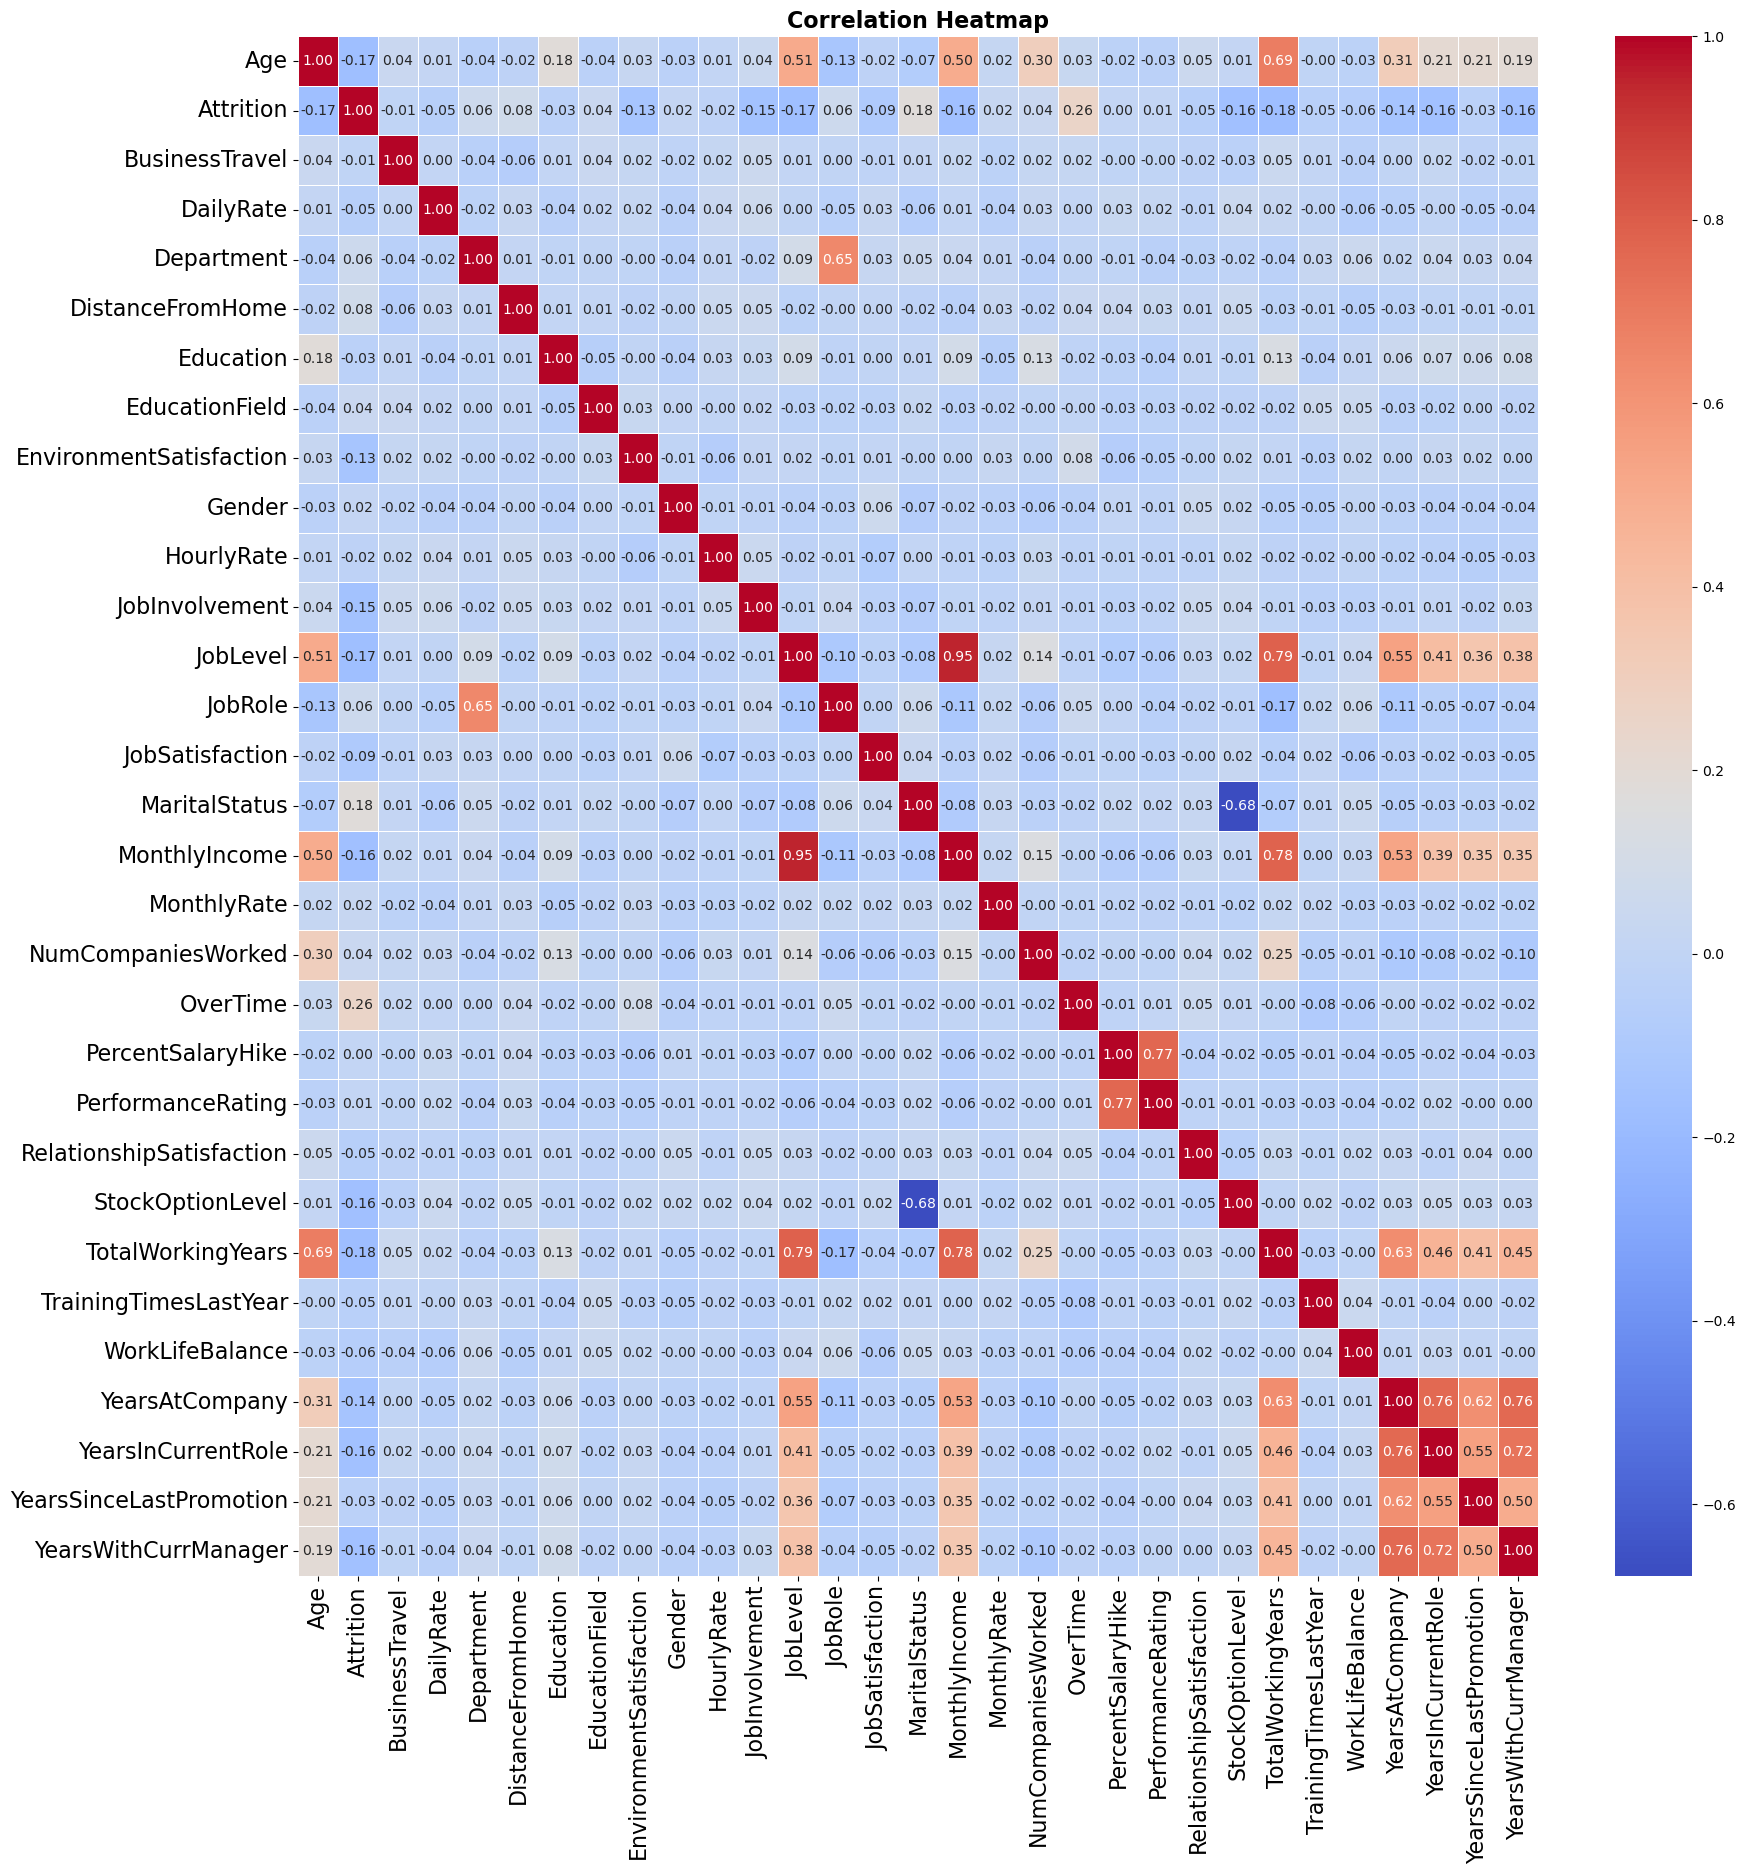

In [30]:
corr = df_model.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=16)
plt.yticks(rotation=0, fontsize=16)
plt.show()

In [31]:
drop_col = ['BusinessTravel', 'DailyRate', 'HourlyRate','DistanceFromHome', 'JobSatisfaction',
            'OverTime', 'PercentSalaryHike', 'StockOptionLevel', 'NumCompaniesWorked',
            'TrainingTimesLastYear', 'YearsSinceLastPromotion', 'YearsInCurrentRole',
            'YearsWithCurrManager', 'MonthlyRate',]

df_model = df_model.drop(drop_col, axis=1)

In [32]:
df_model.columns

Index(['Age', 'Attrition', 'Department', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'PerformanceRating',
       'RelationshipSatisfaction', 'TotalWorkingYears', 'WorkLifeBalance',
       'YearsAtCompany'],
      dtype='object')

### Split Dataset

In [33]:
X = df_model.drop(columns="Attrition")
y = df_model["Attrition"]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training :", X_train.shape)
print("Testing :", X_test.shape)

Training : (846, 16)
Testing : (212, 16)


### Feature Scaling

##### Standarisasi

In [35]:
# Melakukan Standarisasi untuk beberapa fitur
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)

In [36]:
X_train

array([[ 0.10346272,  1.42914925, -0.85222507, ..., -0.06883382,
         0.34612675, -0.02144901],
       [-1.7156092 , -0.50225693, -0.85222507, ..., -1.06004077,
         1.75393072, -0.65814603],
       [-1.39459651, -0.50225693,  0.11814156, ..., -0.68833816,
         0.34612675, -0.18062327],
       ...,
       [-0.6455669 ,  1.42914925,  0.11814156, ..., -0.19273469,
        -1.06167723, -0.33979752],
       [ 0.10346272, -0.50225693,  1.0885082 , ..., -0.19273469,
        -1.06167723,  0.29689949],
       [-0.43155843,  1.42914925,  0.11814156, ..., -0.9361399 ,
         0.34612675, -0.65814603]])

Pada tahap ini, Beberapa fitur akan dilakukan standarisasi. Hal ini dilakukan agar data dapat digunakan untuk proses pemodelan.

# Modeling

In [37]:
# Selection model
models = {}

# Logistic Regression
models['Logistic Regression'] = LogisticRegression(random_state=42)

# Decision Trees
models['Decision Trees'] = DecisionTreeClassifier(random_state=42)

# Random Forest
models['Random Forest'] = RandomForestClassifier(random_state=42)

# XGBoost
models['XGBoost'] = XGBClassifier(random_state=42)

# Naive Bayes
models['Naive Bayes'] = GaussianNB()

In [38]:
accuracy, precision, recall, f1, roc_auc = {}, {}, {}, {}, {}

for key in models.keys():
    # Melakukan train setiap model
    models[key].fit(X_train, y_train)

    # Melakukan prediksi model
    predict = models[key].predict(X_test)

    # Menghitung metrik Accuracy, Precision and Recall
    accuracy[key] = accuracy_score(y_test, predict)
    precision[key] = precision_score(y_test, predict)
    recall[key] = recall_score(y_test, predict)
    f1[key] = f1_score(y_test, predict)
    roc_auc[key] = roc_auc_score(y_test, predict)

In [39]:
# Menampilkan evaluasi setiap model
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Roc_Auc'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['F1-Score'] = f1.values()
df_model['Roc_Auc'] = roc_auc.values()

round(df_model, 2)

,Accuracy,Precision,Recall,F1-Score,Roc_Auc
Logistic Regression,0.18,0.18,1.00,0.31,0.50
Decision Trees,0.16,0.13,0.64,0.22,0.35
Random Forest,0.20,0.14,0.64,0.23,0.37
XGBoost,0.83,1.00,0.08,0.14,0.54
Naive Bayes,0.82,0.00,0.00,0.00,0.50


# Evaluasi

In [40]:
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

### Cross Validation

In [42]:
for name, model in models.items():
    # Cross validation score
    y_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='f1')

    # cetak rata-rata skor
    print(f"Rata-rata skor {name}:", round(np.mean(y_scores), 2))

Rata-rata skor Logistic Regression: 0.66
Rata-rata skor Decision Trees: 0.92
Rata-rata skor Random Forest: 0.97
Rata-rata skor XGBoost: 0.95
Rata-rata skor Naive Bayes: 0.68


### Confusion Matriks

In [43]:
models = {}

# Logistic Regression
models['Logistic Regression'] = LogisticRegression(random_state=42)

# Decision Trees
models['Decision Trees'] = DecisionTreeClassifier(random_state=42)

# Random Forest
models['Random Forest'] = RandomForestClassifier(random_state=42)

# XGBoost
models['XGBoost'] = XGBClassifier(random_state=42)

# Naive Bayes
models['Naive Bayes'] = GaussianNB()

Classification Report model Logistic Regression:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       178
           1       0.66      0.66      0.66       174

    accuracy                           0.66       352
   macro avg       0.66      0.66      0.66       352
weighted avg       0.66      0.66      0.66       352



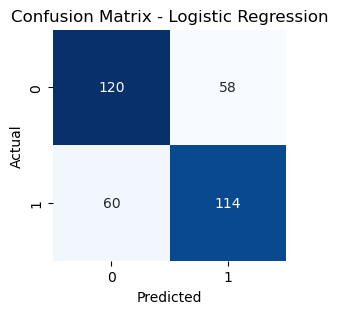

Classification Report model Decision Trees:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       178
           1       0.84      0.97      0.90       174

    accuracy                           0.89       352
   macro avg       0.90      0.90      0.89       352
weighted avg       0.90      0.89      0.89       352



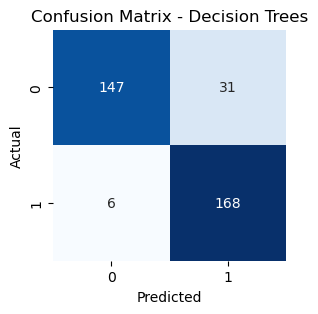

Classification Report model Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       178
           1       0.94      0.96      0.95       174

    accuracy                           0.95       352
   macro avg       0.95      0.95      0.95       352
weighted avg       0.95      0.95      0.95       352



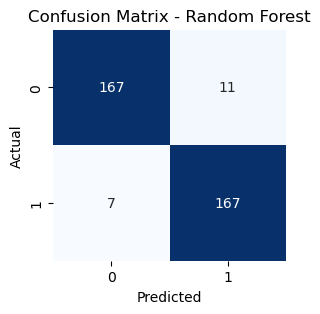

Classification Report model XGBoost:
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       178
           1       0.90      0.96      0.93       174

    accuracy                           0.93       352
   macro avg       0.93      0.93      0.93       352
weighted avg       0.93      0.93      0.93       352



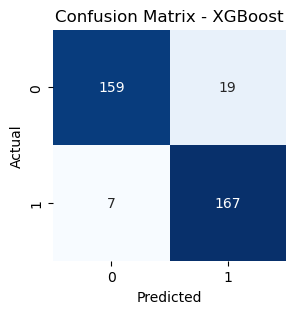

Classification Report model Naive Bayes:
              precision    recall  f1-score   support

           0       0.67      0.54      0.60       178
           1       0.61      0.72      0.66       174

    accuracy                           0.63       352
   macro avg       0.64      0.63      0.63       352
weighted avg       0.64      0.63      0.63       352



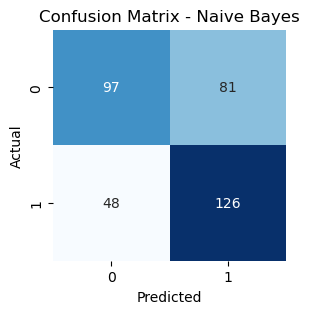

Model terbaik: RandomForestClassifier(random_state=42)


In [44]:
best_model = None
best_accuracy = 0

for name, model in models.items():
    # Melakukan train setiap model
    model.fit(X_train, y_train)

    # Melakukan prediksi model
    predict = model.predict(X_test)

    # Best Model
    accuracy = accuracy_score(y_test, predict)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

    # Classification Report
    print(f"Classification Report model {name}:")
    print(classification_report(y_test, predict))

    # Confusion Matrix
    cm = confusion_matrix(y_test, predict)
    plt.figure(figsize=(3, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

print(f"Model terbaik: {best_model}")

# Save File

In [47]:
# Data Clean
df_clean.to_csv("Data_Clean.csv", index=False)

In [48]:
# Data Visualisasi
df_visualisasi.to_csv("Data_to_Visualisasi.csv", index=False)

In [49]:
# Data Model
df_model.to_csv("Data_to_model.csv", index=False)

In [50]:
# Save Model
filename = 'result_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(best_model, file)